In [1]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.patches import Ellipse
import matplotlib.gridspec as gridspec
import gseapy as gp
from matplotlib.lines import Line2D
import matplotlib.cm as cm
from glimmer.model import train_neighbor_weights, set_seed
from glimmer.utils import spatial_smooth, plot_logbarrier_curve, run_logbarrier_weight

warnings.filterwarnings('ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
%config InlineBackend.figure_format = 'retina' 

In [2]:
# Set path
main_path = '/data/qiyu/spatialRegion/'
fig_path = main_path + 'figures/SVG/'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'DejaVu Sans'
dir = main_path + 'data/slidetag/slidetag_mm1_ee/' 

## 1. Test Glimmer with list of log barriers

Loading adata


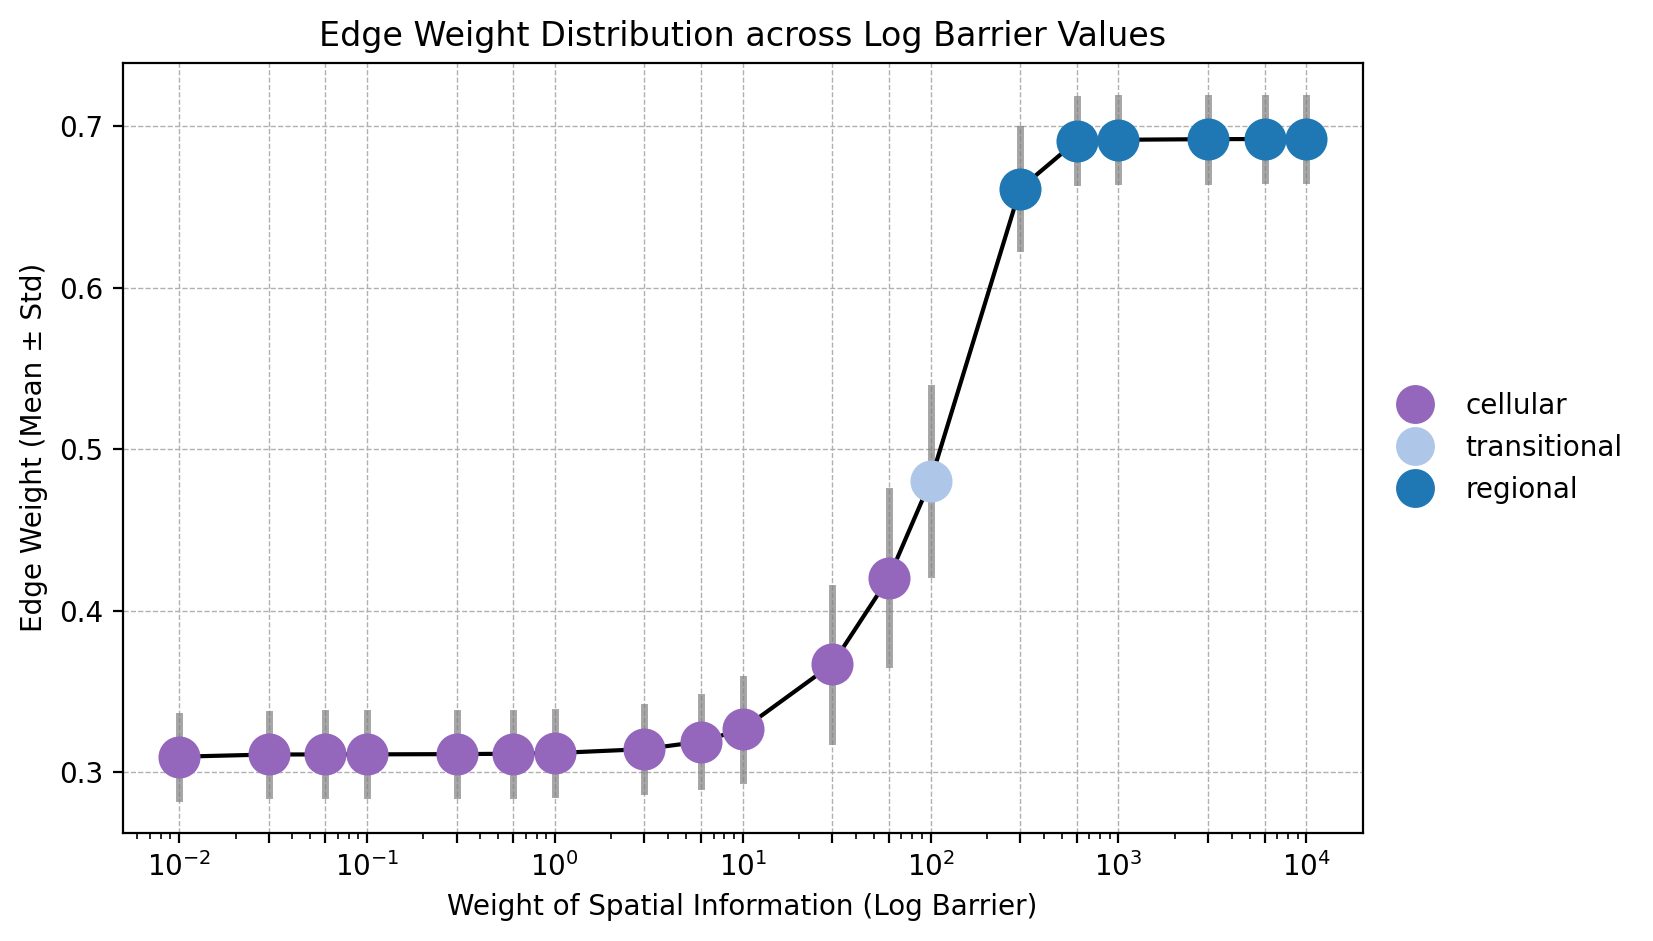

In [3]:
seed = 42
set_seed(seed)
save_path = dir + 'adata_log_barrier_test.h5ad'
log_barrier_list = [
    0.01, 0.03, 0.06,
    0.1, 0.3, 0.6, 
    1, 3, 6, 
    10, 30, 60, 
    100, 300, 600, 
    1000, 3000, 6000,
    10000
]
if os.path.exists(save_path):
    print('Loading adata')
    adata = sc.read_h5ad(save_path)
    fig, ax = plot_logbarrier_curve(adata, log_barrier_list, figsize=(8, 5))
else:
    adata = sc.read_h5ad(os.path.join(dir, 'rna_adata.h5ad'))
    adata.obsm["spatial"] = pd.read_csv(os.path.join(dir, "coord.csv"), index_col=0).values
    sc.pp.normalize_total(adata, target_sum=1e4) 
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=3000)
    sc.tl.pca(adata, svd_solver='arpack', n_comps=50)
    adata = run_logbarrier_weight(adata, log_barrier_list=log_barrier_list, seed=seed)
    adata.write_h5ad(save_path)